In [1]:
%matplotlib inline

In [2]:
from fastai2.vision.all import *
from nbdev.showdoc import *
set_seed(2)

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

Path('/home/ubuntu/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
dls = ImageDataLoaders.from_name_re(
    path, fnames, pat=r'(.+)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

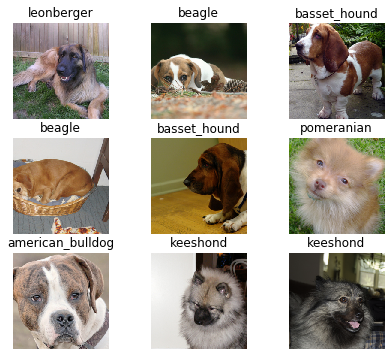

In [8]:
dls.show_batch(max_n=9, figsize=(7,6))

In [9]:
print(dls.vocab)
len(dls.vocab),dls.c

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]


(37, 37)

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 23.1MB/s]


In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.339832,0.347089,0.102842,00:12


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)

True

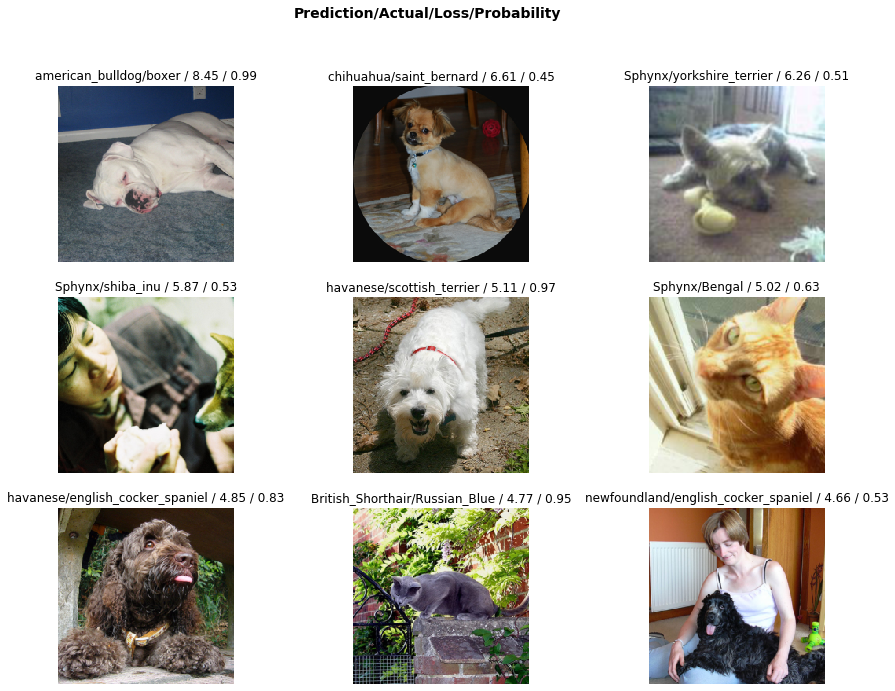

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

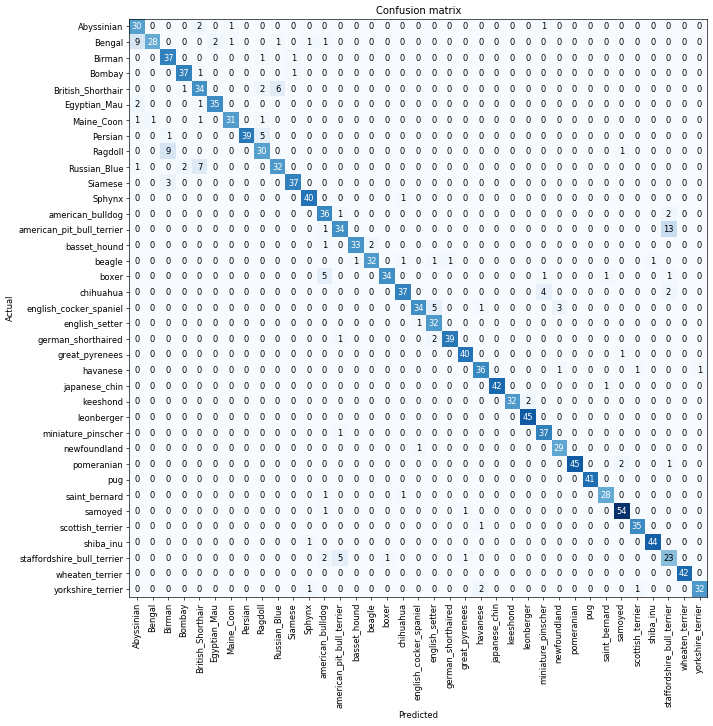

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 13),
 ('Bengal', 'Abyssinian', 9),
 ('Ragdoll', 'Birman', 9),
 ('Russian_Blue', 'British_Shorthair', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Persian', 'Ragdoll', 5),
 ('boxer', 'american_bulldog', 5),
 ('english_cocker_spaniel', 'english_setter', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Siamese', 'Birman', 3),
 ('english_cocker_spaniel', 'newfoundland', 3),
 ('Abyssinian', 'British_Shorthair', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'staffordshire_bull_terrier', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('keeshond', 'leonberger', 2),
 ('pomeranian', 'samoyed', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('yorkshire_ter

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.613783,0.291909,0.094723,00:15
1,0.523415,0.274578,0.089986,00:14
